<center><h1 style="background-color: #C6F3CD; border-radius: 10px; color: #FFFFFF; padding: 5px;">
Data Viz
</h1><center/>

**Link to the article** :  https://medium.com/@soulawalid/your-ultimate-guide-to-data-visualization-cab3a52e7884?sk=23d89a1ccc4eaf61bda7aed8a3b63df4

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the 'tips' dataset
tips = sns.load_dataset('tips')

# Display the first few rows of the dataset
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

### Scatter Plot

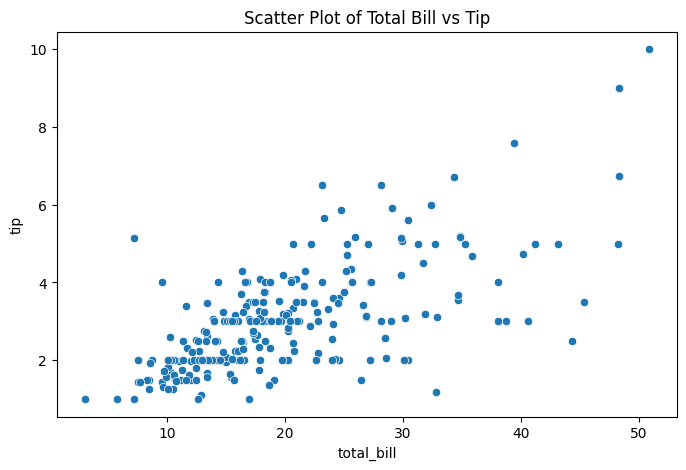

In [3]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=tips, x='total_bill', y='tip')
plt.title('Scatter Plot of Total Bill vs Tip')
plt.show()

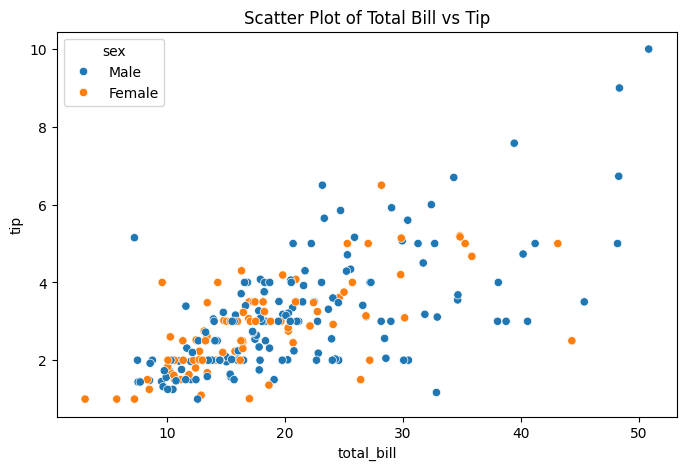

In [4]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='sex')
plt.title('Scatter Plot of Total Bill vs Tip')
plt.show()

<Axes: xlabel='total_bill', ylabel='tip'>

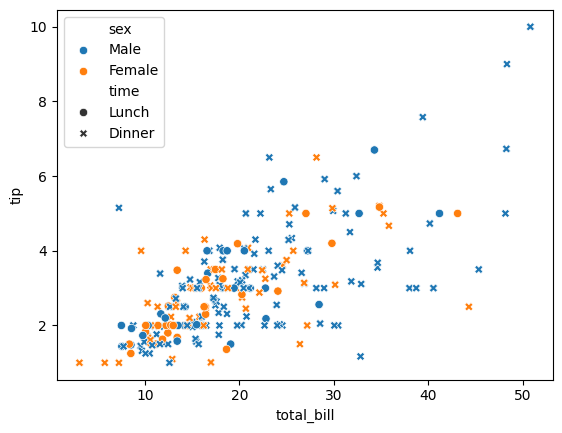

In [5]:
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='sex', style='time')

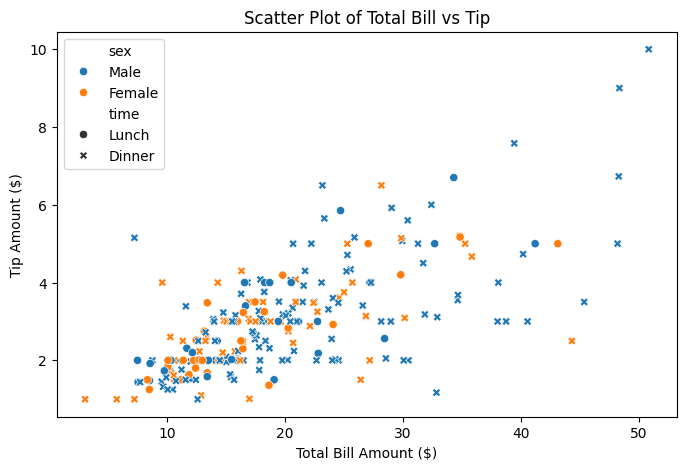

In [6]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='sex', style='time')
plt.title('Scatter Plot of Total Bill vs Tip')

# Changing the axis labels
plt.xlabel('Total Bill Amount ($)')
plt.ylabel('Tip Amount ($)')

plt.show()

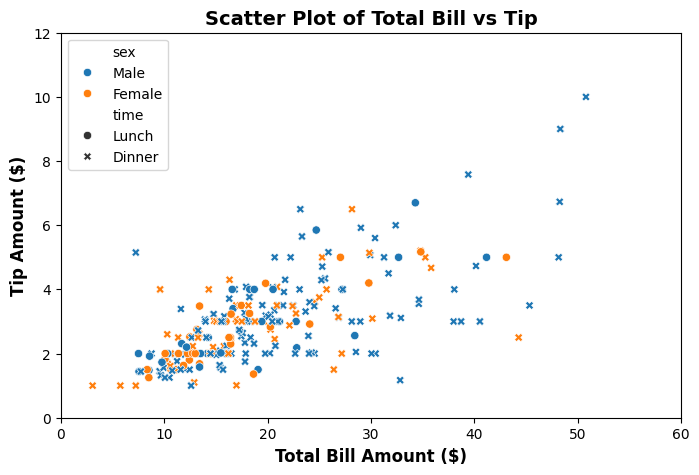

In [7]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='sex', style='time')
plt.title('Scatter Plot of Total Bill vs Tip', fontsize=14, fontweight='bold')

# Changing the axis labels with custom font size and weight
plt.xlabel('Total Bill Amount ($)', fontsize=12, fontweight='bold')
plt.ylabel('Tip Amount ($)', fontsize=12, fontweight='bold')

# Setting the range for x and y axes
plt.xlim(0, 60)   # Example range for the x-axis
plt.ylim(0, 12)   # Example range for the y-axis

plt.show()

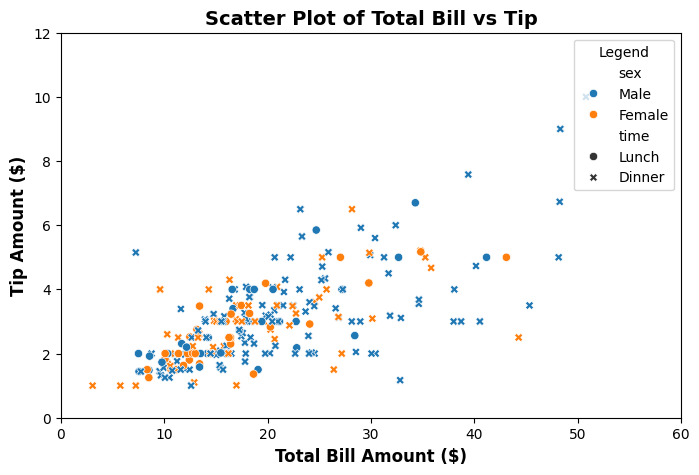

In [8]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='sex', style='time')
plt.title('Scatter Plot of Total Bill vs Tip', fontsize=14, fontweight='bold')

# Customizing axis labels and ranges
plt.xlabel('Total Bill Amount ($)', fontsize=12, fontweight='bold')
plt.ylabel('Tip Amount ($)', fontsize=12, fontweight='bold')
plt.xlim(0, 60)
plt.ylim(0, 12)

# Changing the legend placement
plt.legend(loc='upper right', title='Legend')  # Possible values: 'upper left', 'upper right', 'lower left', 'lower right', etc.

plt.show()

In [9]:
sample = tips.sample(10)

# Create a scatter plot using Plotly Express with annotations
fig = px.scatter(
    sample,
    x='total_bill',
    y='tip',
    color='sex',
    symbol='time',
    labels={'total_bill': 'Total Bill Amount ($)', 'tip': 'Tip Amount ($)'},
    title='Scatter Plot of Total Bill vs Tip'
)

# Adding annotations directly in Plotly
fig.update_traces(text=sample.apply(lambda row: f'({row["total_bill"]:.1f}, {row["tip"]:.1f})', axis=1), 
                  textposition='top center', 
                  mode='markers+text')

fig.show()

### Bar Plot

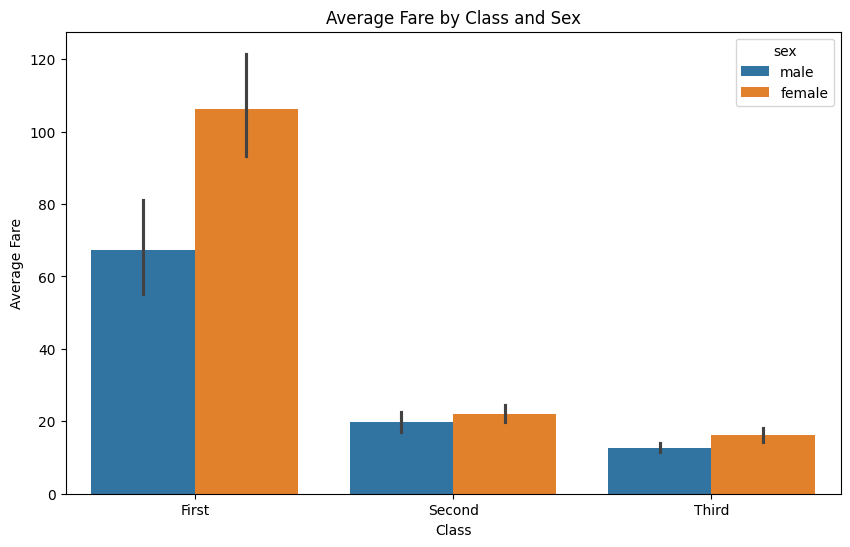

In [10]:
data = sns.load_dataset('titanic')

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='class', y='fare', hue='sex')
plt.title('Average Fare by Class and Sex')
plt.xlabel('Class')
plt.ylabel('Average Fare')
plt.show()

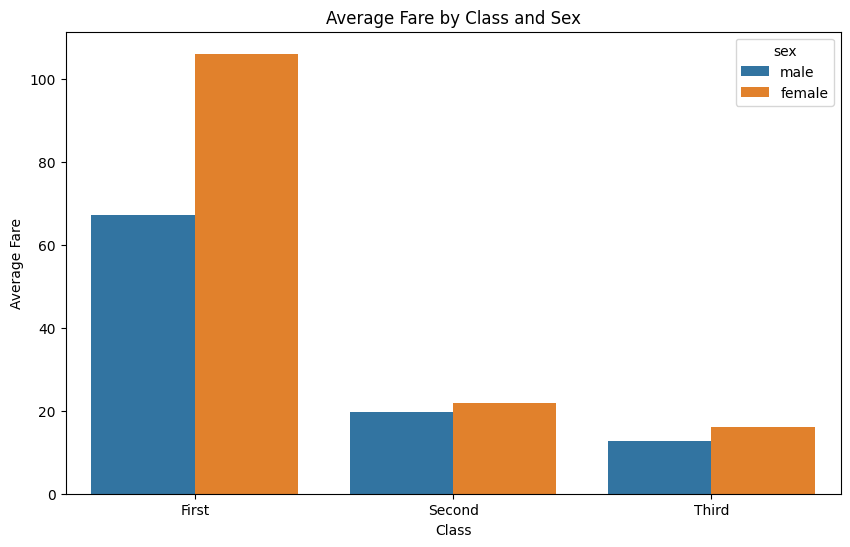

In [11]:
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='class', y='fare', hue='sex', errorbar=None)
plt.title('Average Fare by Class and Sex')
plt.xlabel('Class')
plt.ylabel('Average Fare')
plt.show()

In [12]:
# Create a bar plot using Plotly Express
fig = px.bar(
    data,
    x='class',
    y='fare',
    color='sex',
    labels={'class': 'Class', 'fare': 'Fare'},
    title='Average Fare by Class and Sex',
    text='fare'  # Add text annotations directly to the bars
)

# Update layout to show text annotations correctly
fig.update_traces(texttemplate='%{text:.1f}', textposition='outside')

# Show the figure
fig.show()

In [13]:
# Aggregate data: compute sum of fares for each class and sex
agg_data = data.groupby(['class', 'sex'], as_index=False)['fare'].mean()

# Create a bar plot using Plotly Express
fig = px.bar(
    agg_data,
    x='class',
    y='fare',
    color='sex',
    labels={'class': 'Class', 'fare': 'Fare'},
    title='Total Fare by Class and Sex',
    text='fare'  # Add text annotations directly to the bars
)

# Update layout for grouped bars
fig.update_layout(barmode='group')  # Ensures bars are grouped by 'sex' within each 'class'

# Update traces to format text annotations
fig.update_traces(texttemplate='%{text:.1f}', textposition='outside')

# Show the figure
fig.show()

#### Boxplot

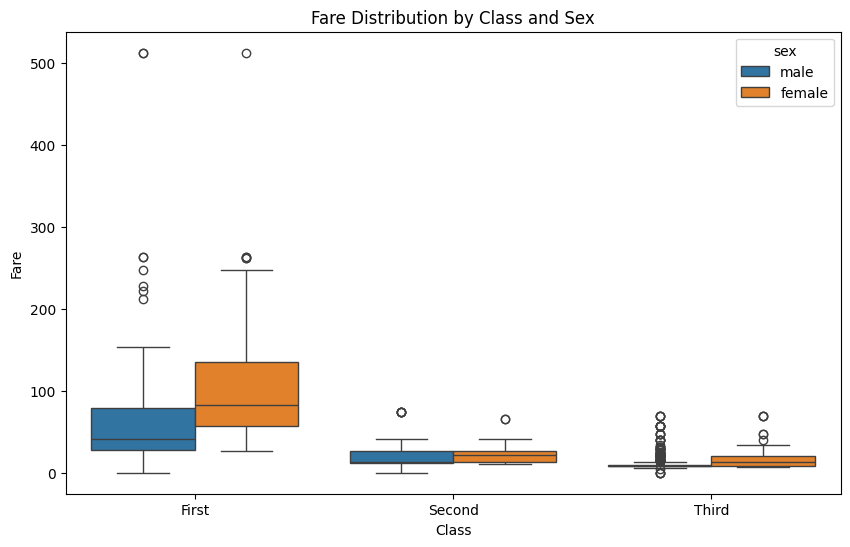

In [14]:
# Create a box plot
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=data, x='class', y='fare', hue='sex')

# Set plot titles and labels
plt.title('Fare Distribution by Class and Sex')
plt.xlabel('Class')
plt.ylabel('Fare')

# Show the plot
plt.show()

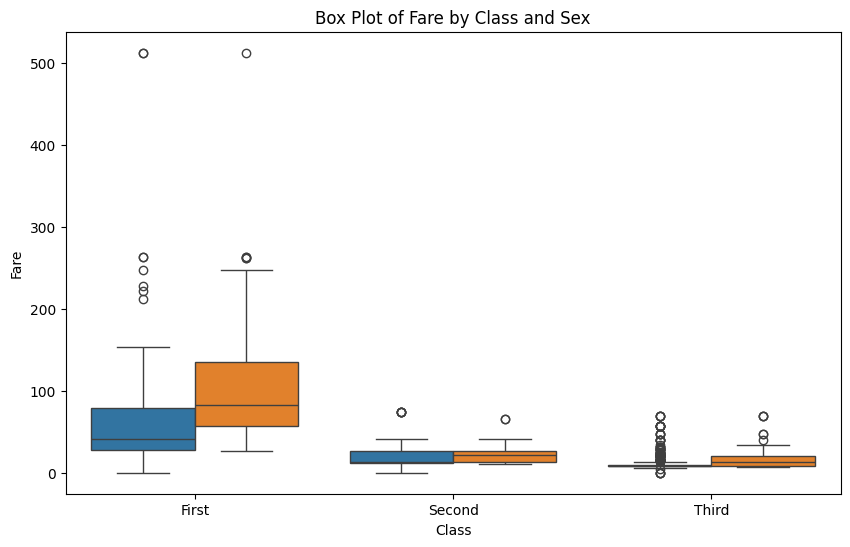

class     sex  count        mean        std      Min  Q1 (25%)  \
0   First  female   94.0  106.125798  74.259988  25.9292  57.24480   
1   First    male  122.0   67.226127  77.548021   0.0000  27.72810   
2  Second  female   76.0   21.970121  10.891796  10.5000  13.00000   
3  Second    male  108.0   19.741782  14.922235   0.0000  12.33125   
4   Third  female  144.0   16.118810  11.690314   6.7500   7.85420   
5   Third    male  347.0   12.661633  11.681696   0.0000   7.75000   

   Median (50%)    Q3 (75%)       Max        IQR  \
0      82.66455  134.500000  512.3292  77.255200   
1      41.26250   78.459375  512.3292  50.731275   
2      22.00000   26.062500   65.0000  13.062500   
3      13.00000   26.000000   73.5000  13.668750   
4      12.47500   20.221875   69.5500  12.367675   
5       7.92500   10.008300   69.5500   2.258300   

                                            Outliers  
0         [263.0, 512.3292, 262.375, 263.0, 262.375]  
1  [263.0, 247.5208, 211.5, 263.0, 221.7792, 227....  
2                                       [65.0, 65.0]  
3                     [73.5, 73.5, 73.5, 73.5, 73.5]  
4         [46.9, 69.55, 39.6875, 46.9, 69.55, 69.55]  
5  [21.075, 31.275, 29.125, 15.5, 21.6792, 39.687...

In [15]:
# Calculate the statistics for each group
stats = data.groupby(['class', 'sex'])['fare'].describe(percentiles=[0.25, 0.5, 0.75]).reset_index()

# Rename columns for clarity
stats.rename(columns={'25%': 'Q1 (25%)', '50%': 'Median (50%)', '75%': 'Q3 (75%)', 'min': 'Min', 'max': 'Max'}, inplace=True)

# Calculate the Interquartile Range (IQR)
stats['IQR'] = stats['Q3 (75%)'] - stats['Q1 (25%)']

# Identify outliers: any fare below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR
stats['Outliers'] = data.groupby(['class', 'sex'])['fare'].apply(lambda x: x[(x < x.quantile(0.25) - 1.5 * (x.quantile(0.75) - x.quantile(0.25))) |
                                                                            (x > x.quantile(0.75) + 1.5 * (x.quantile(0.75) - x.quantile(0.25)))].tolist()).reset_index(drop=True)

# Plot the box plot using Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='class', y='fare', hue='sex')
plt.title('Box Plot of Fare by Class and Sex')
plt.xlabel('Class')
plt.ylabel('Fare')
plt.legend([],[], frameon=False) # Remove the legend

plt.show()

# Display the computed statistics as a DataFrame
stats


#### Heatmap

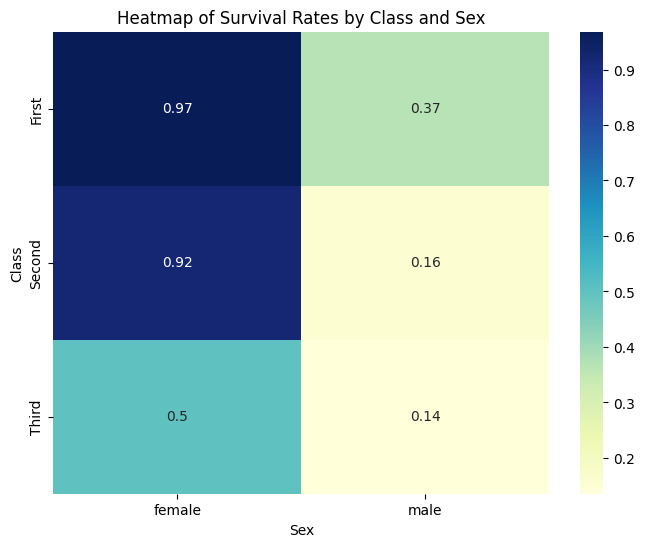

In [16]:
# Create a pivot table for 'class' and 'survived' counts
pivot_data = data.pivot_table(index='class', columns='sex', values='survived', aggfunc='mean')

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_data, annot=True, cmap='YlGnBu', cbar=True)
plt.title('Heatmap of Survival Rates by Class and Sex')
plt.xlabel('Sex')
plt.ylabel('Class')
plt.show()

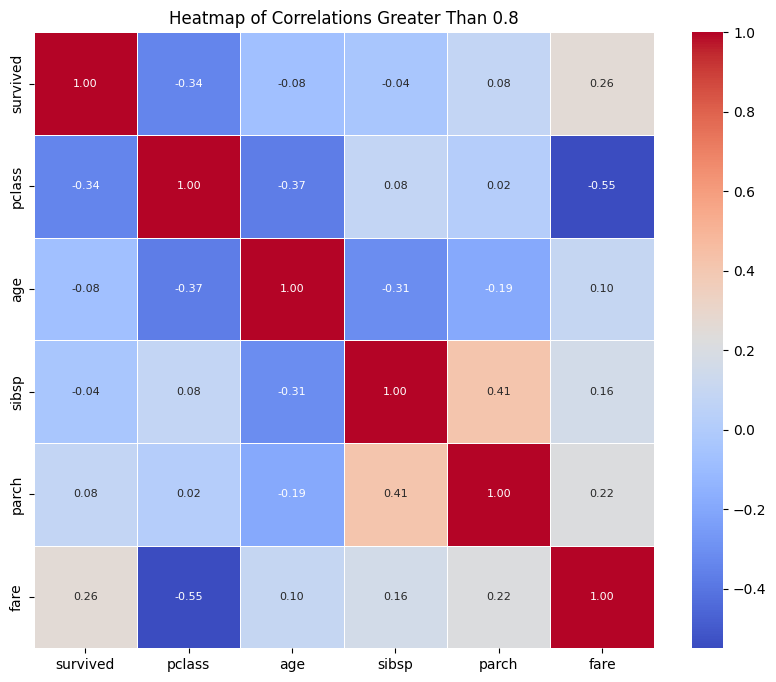

In [17]:
numeric_data = data.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Mask for displaying only correlations greater than 0.8
# mask = correlation_matrix.abs() <= 0.8

# Apply the mask to show only correlations greater than 0.8
# filtered_corr = correlation_matrix.mask(mask)

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix, #filtered_corr
    annot=True,
    cmap='coolwarm',
    cbar=True,
    annot_kws={"size": 8},
    fmt=".2f",
    linewidths=0.5
)
plt.title('Heatmap of Correlations Greater Than 0.8')
plt.show()

#### Pie Chart

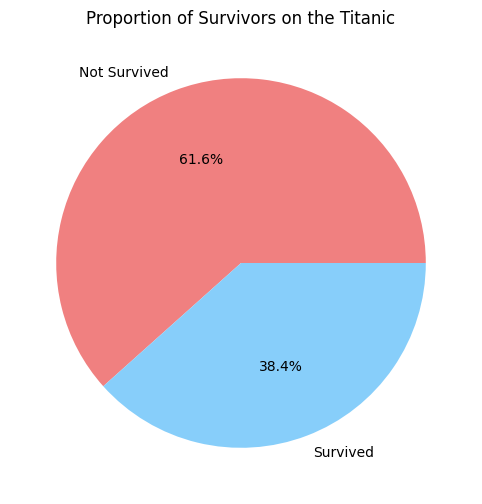

In [18]:
survival_counts = data['survived'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(survival_counts, labels=['Not Survived', 'Survived'], autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'])
plt.title('Proportion of Survivors on the Titanic')
plt.show()

#### Histogram

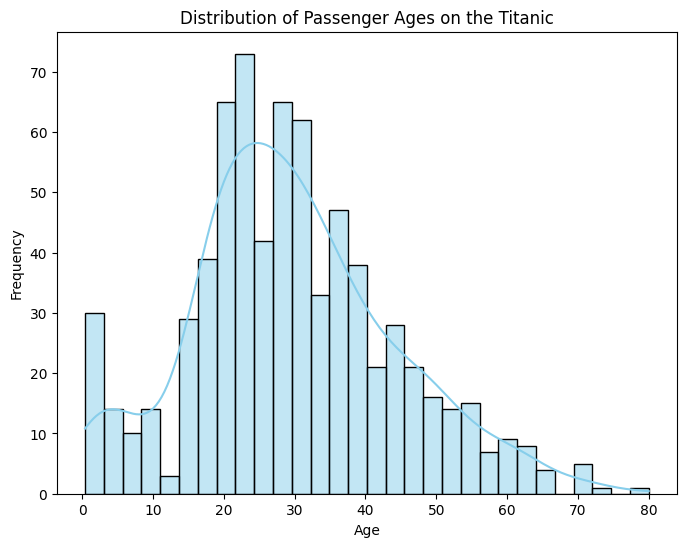

In [19]:
# Create a histogram of passenger ages
plt.figure(figsize=(8, 6))
sns.histplot(data['age'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Passenger Ages on the Titanic')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#### Pair Plot

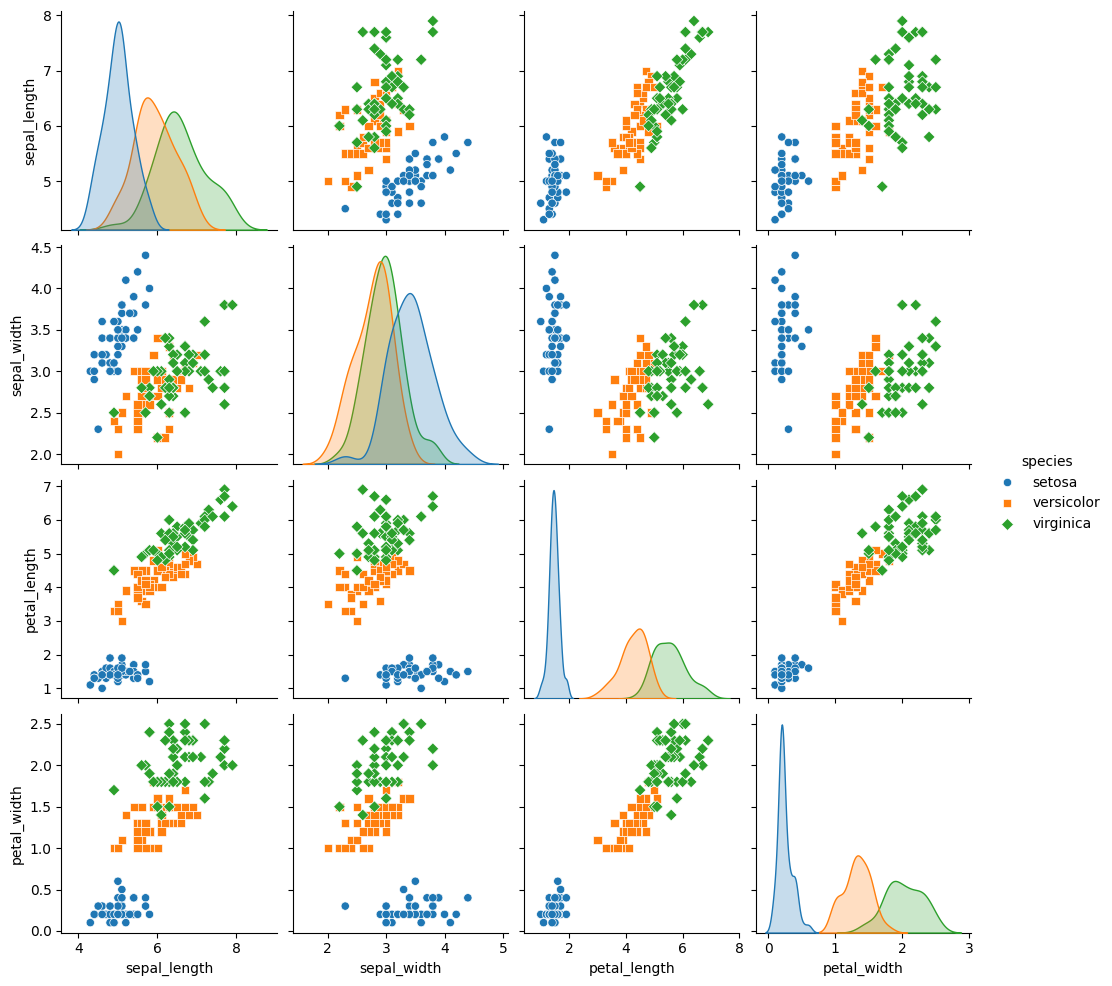

In [20]:
# Load the 'iris' dataset from Seaborn
data = sns.load_dataset('iris')

# Create a pair plot
sns.pairplot(data, hue='species', diag_kind='kde', markers=['o', 's', 'D'])

# Show the plot
plt.show()

#### Violin Plot

In [21]:
# Create a violin plot using Plotly Express
fig = px.violin(tips, x='day', y='total_bill', color='sex', 
                title='Distribution of Total Bill by Day and Sex', 
                box=True, points='all')

fig.show()

#### Area Chart

In [22]:
dates = pd.date_range(start='2024-01-01', periods=10, freq='D')
values = [10, 20, 30, 40, 45, 50, 60, 65, 70, 80]
time_series_data = pd.DataFrame({'date': dates, 'value': values})

# Create an area chart using Plotly Express
fig = px.area(time_series_data, x='date', y='value', 
              title='Cumulative Value Over Time',
              labels={'date': 'Date', 'value': 'Value'})

fig.show()

#### Bubble Chart

In [23]:
# Create a bubble chart using Plotly Express
fig = px.scatter(
    tips, 
    x='total_bill', 
    y='tip', 
    size='size', 
    color='day', 
    hover_name='sex', 
    title='Bubble Chart of Total Bill vs Tip with Party Size',
    labels={'total_bill': 'Total Bill', 'tip': 'Tip', 'size': 'Party Size'}
)

fig.show()